# Data Visualization
Visualize the lidar, joystick, and 10m goal data

In [1]:
from dataset import CLIPDataModule, CLIPSet
from termcolor import cprint
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import utils
import cv2
%matplotlib inline

/home/abhinavc/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create CLIPDataModule

In [2]:
dm = CLIPDataModule(data_path='../data/',
                    batch_size=32,
                    num_workers=4,
                    joy_len=300,
                    include_lidar_file_names=True,
                    verbose=True)

dm.setup()

loading data from ../data/...
skip first 50 frames
batch size: 32
future joystick length: 300

creating training set...


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


creating validation set...


100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

training size: 3509 samples
validation size: 841 samples


In [3]:
cprint(f"number of samples: {len(dm.training_set) + len(dm.validation_set)}",
       'green',
       attrs=['bold'])


number of samples: 4350


## Test Training DataLoader
Check if all batches can be retrieved successfully

### Shape Information:
```lidar_stack.shape``` = (batch size, channels, img height, img width) \
```joystick.shape``` = (batch size, joy_len, 3) \
```goal.shape``` = (batch size, 2)


In [4]:
# turn train_dataloader into iterable
trainloader = dm.train_dataloader()
train_iter = iter(trainloader)
print(f'number of batches: {len(trainloader)}')

number of batches: 109


In [5]:
%%time
for i, batch in enumerate(trainloader):
    lidar, joystick, goal = batch
    lidar_stack = lidar[0]
    lidar_fnames = lidar[1]
    if i == 1:
        print('lidar img batch shape: ', lidar_stack.shape)
        print('lidar file names batch shape: ', lidar_fnames.shape)
        print('joystick batch shape: ', joystick.shape)
        print('goal batch shape: ', goal.shape)

cprint(f'successfully retrieved all batches !!!', color='green', attrs=['bold'])

lidar img batch shape:  torch.Size([32, 5, 400, 400])
lidar file names batch shape:  torch.Size([32, 5])
joystick batch shape:  torch.Size([32, 300, 3])
goal batch shape:  torch.Size([32, 2])
successfully retrieved all batches !!!
CPU times: user 228 ms, sys: 1.72 s, total: 1.95 s
Wall time: 27.4 s


## Select Random Sample from Training Data

In [6]:
import random

# create CLIPset from larger pkl file
train_set = CLIPSet(pickle_file_path='../data/2021-11-15-15-06-15_final.pkl', include_lidar_file_names=True)

# select random index
idx = random.randint(0, len(train_set))

# get random sample
sample = train_set[idx]

## Visualize Lidar Stack 

index: 19, total offset: 50


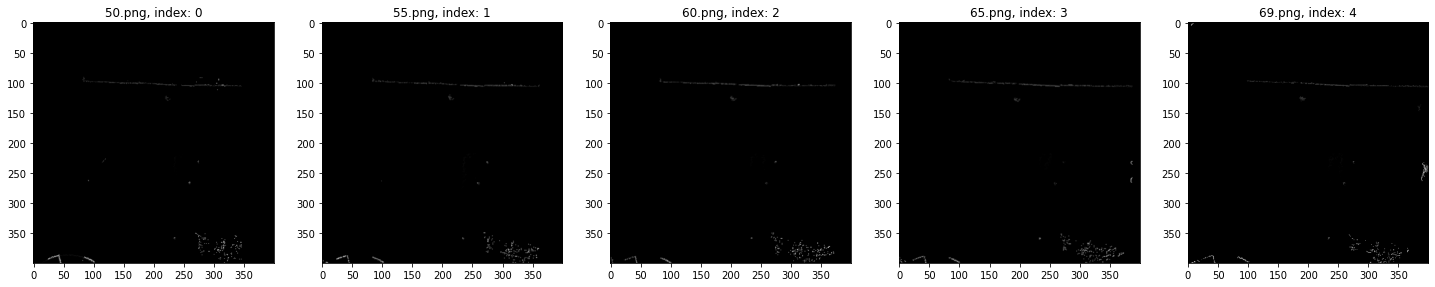

In [7]:
# visualize mode returns lidar stack
# and the corresponding file names
lidar_stack = sample[0][0]
lidar_fnames = sample[0][1]

cprint(f'index: {idx}, total offset: 50', color='green', attrs=['bold'])
utils.visualize_lidar_stack(lidar_stack=lidar_stack, file_names=lidar_fnames)

## Visualize Joystick Data

In table format

In [8]:
joystick = sample[1]
print('joystick dtype: ', joystick.dtype)
print('joystick shape: ', joystick.shape)

joy_df = pd.DataFrame(data=joystick,
                      columns=['linear_x', 'linear_y', 'angular_z'])
joy_df

joystick dtype:  float32
joystick shape:  (300, 3)


,linear_x,linear_y,angular_z
0,1.6,0.0,-0.0
1,1.6,0.0,-0.0
2,1.6,0.0,-0.0
3,1.6,0.0,-0.0
4,1.6,0.0,-0.0
5,1.6,0.0,-0.0
6,1.6,0.0,-0.0
7,1.6,0.0,-0.0
8,1.6,0.0,-0.0
9,1.6,0.0,-0.0


## Goal Information
(x, y) location relative to the current position of the robot

In [9]:
goal = sample[2]
print(f'x: {goal[0]:.2f}, y: {goal[1]:.2f}')

x: 9.98, y: 0.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


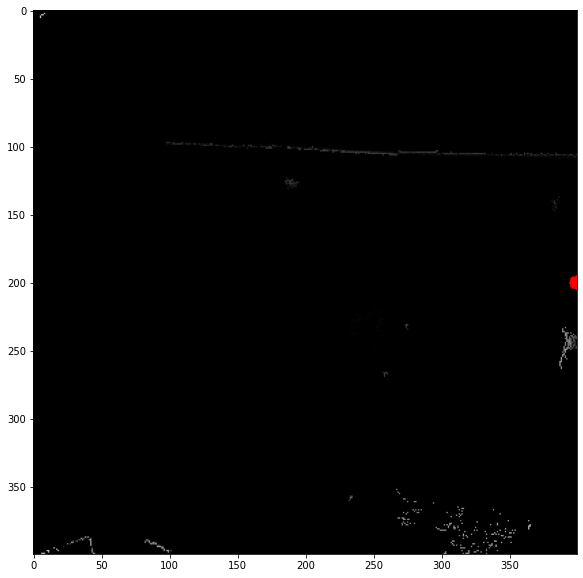

In [10]:
import numpy as np

data = pickle.load(open('../data/2021-11-15-15-06-15_final.pkl', 'rb'), encoding='latin1')
lidar_frame_w_goal = utils.visualize_goal(lidar_frame=lidar_stack[-1], goal=goal)
plt.figure(figsize=(10, 10))
plt.imshow(lidar_frame_w_goal);